## Time series preprocessing

In [6]:
# TSPredIT
# version 1.0.707

source("https://raw.githubusercontent.com/cefet-rj-dal/tspredit-examples/main/jupyter.R")

#loading TSPredIT
load_library("daltoolbox") 
load_github("cefet-rj-dal/tspredit") 

### Noise cosine series for studying

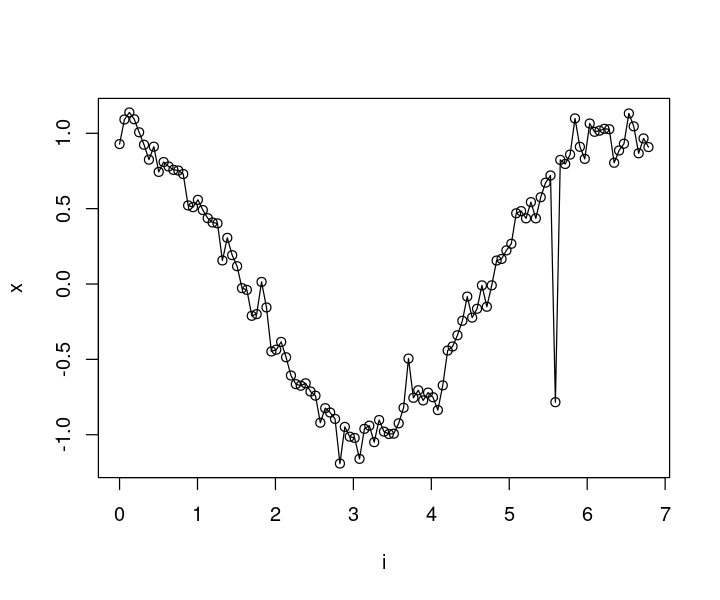

In [7]:
i <- seq(0, 2*pi+8*pi/50, pi/50)
x <- cos(i)
noise <- rnorm(length(x), 0, sd(x)/10)

x <- x + noise
x[30] <-rnorm(1, 0, sd(x))

x[60] <-rnorm(1, 0, sd(x))

x[90] <-rnorm(1, 0, sd(x))


options(repr.plot.width=6, repr.plot.height=5)  
par(mfrow = c(1, 1))
plot(i, x)
lines(i, x)

### sliding windows

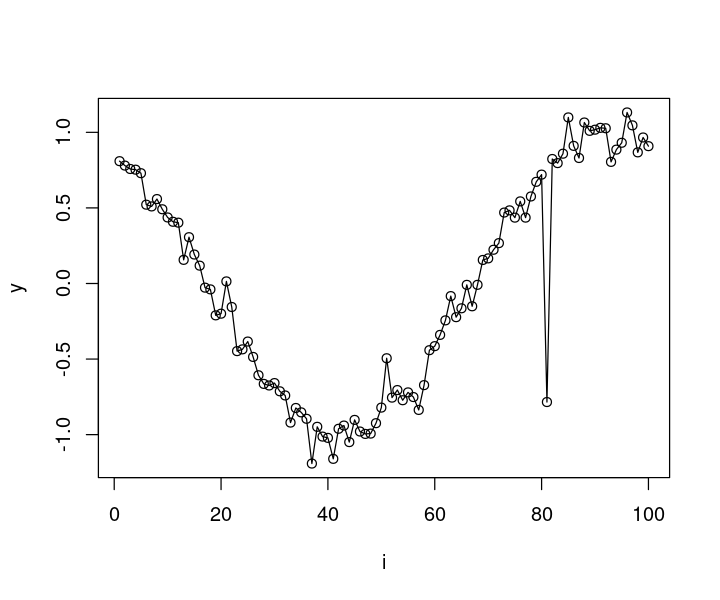

In [8]:
sw_size <- 10
xw <- ts_data(x, sw_size)
i <- 1:nrow(xw)
y <- xw[,sw_size]

plot(i, y)
lines(i, y)

### augment

In [11]:
filter <- tspredit::ts_aug_awaresmooth()
xa <- transform(filter, xw)
idx <- attr(xa, "idx")


ERROR: Error: 'ts_aug_awaresmooth' is not an exported object from 'namespace:tspredit'


### Plot

In [ ]:
plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}